In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor,HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor
from sklearn. preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
mini_data=data[['GrLivArea','YearBuilt','SalePrice']]

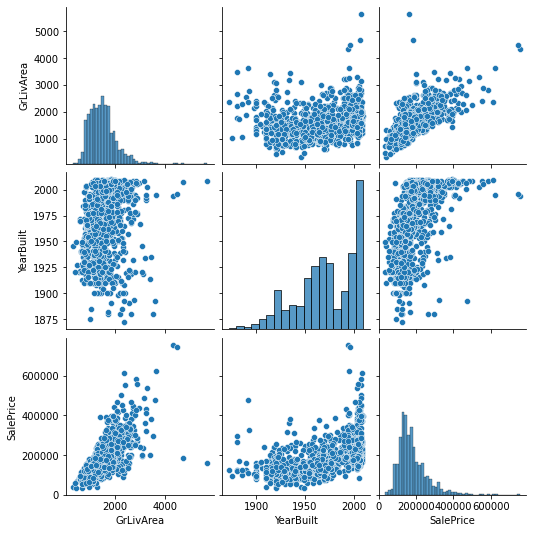

In [ ]:
sns.pairplot(mini_data);

In [ ]:
log_mini_data=mini_data.apply(np.log1p)

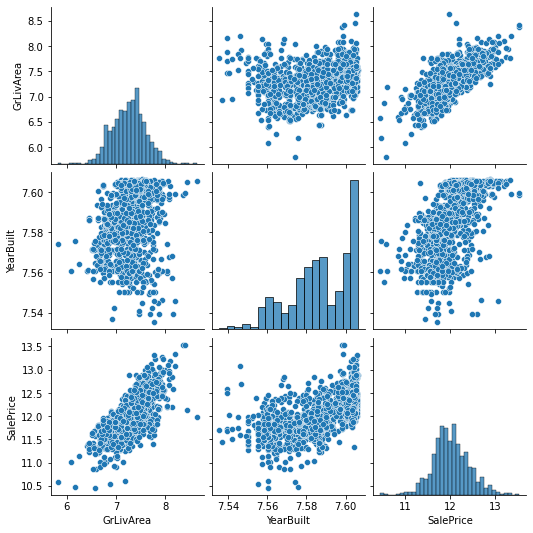

In [ ]:
sns.pairplot(log_mini_data);

In [ ]:
X=log_mini_data[['GrLivArea','YearBuilt']].values
y=log_mini_data['SalePrice'].values

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),DecisionTreeRegressor()]
kf=KFold(n_splits=5,random_state=None,shuffle=False)
for regr in model:
    result= -cross_val_score(regr,X,y,cv=kf,scoring="neg_mean_squared_error")
    result_mean=np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean),'MODEL:',str(regr))

CV_MSE_MEAN:0.046 MODEL: LinearRegression()
CV_MSE_MEAN:0.047 MODEL: SVR()
CV_MSE_MEAN:0.072 MODEL: DecisionTreeRegressor()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)
print('X_train:',X_train.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_valid:',y_valid.shape)

X_train: (1168, 2)
X_valid: (292, 2)
y_train: (1168,)
y_valid: (292,)


In [ ]:
regr1=LinearRegression().fit(X_train,y_train)
regr2=SVR().fit(X_train,y_train)
regr3=DecisionTreeRegressor().fit(X_train,y_train)

y_pred1=regr1.predict(X_valid)
y_pred2=regr2.predict(X_valid)
y_pred3=regr3.predict(X_valid)
y_pred_blend1=np.mean([y_pred1,y_pred2,y_pred3],axis=0)
mse=mean_squared_error(y_valid,y_pred_blend1)
rmse=np.sqrt(mse)
r2=r2_score(y_valid,y_pred_blend1)
print('MSE:{:.3f}'.format(mse))

MSE:0.046


In [ ]:

kf=KFold(n_splits=5,random_state=None,shuffle=False)
Params=[1,10,20]
for rn in Params:
    regr=DecisionTreeRegressor(random_state=rn)
    result= -cross_val_score(regr,X,y,cv=kf,scoring="neg_mean_squared_error")
    result_mean=np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean),'MODEL:',str(regr))

CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=1)
CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=10)
CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=20)


In [ ]:
regr1=DecisionTreeRegressor(random_state=1).fit(X_train,y_train)
regr2=DecisionTreeRegressor(random_state=10).fit(X_train,y_train)
regr3=DecisionTreeRegressor(random_state=20).fit(X_train,y_train)
y_pred1=regr1.predict(X_valid)
y_pred2=regr2.predict(X_valid)
y_pred3=regr3.predict(X_valid)
y_pred_blend2=np.mean([y_pred1,y_pred2,y_pred3],axis=0)
mse=mean_squared_error(y_valid,y_pred_blend2)
rmse=np.sqrt(mse)
r2=r2_score(y_valid,y_pred_blend2)
print('MSE:{:.3f}'.format(mse))



MSE:0.083


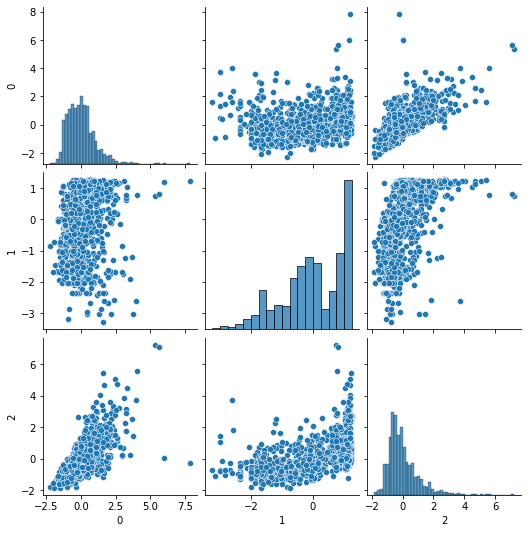

In [ ]:
from sklearn.preprocessing import StandardScaler
std_mini_data=StandardScaler().fit_transform(mini_data)

sns.pairplot(pd.DataFrame(std_mini_data));

In [ ]:
X=std_mini_data[:,:-1]
y=std_mini_data[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)
print('X_train:',X_train.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_valid:',y_valid.shape)


X_train: (1168, 2)
X_valid: (292, 2)
y_train: (1168,)
y_valid: (292,)


In [ ]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor()]
kf=KFold(n_splits=5,random_state=None,shuffle=False)
for regr in model:
    result= -cross_val_score(regr,X,y,cv=kf,scoring="neg_mean_squared_error")
    result_mean=np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean),'MODEL:',str(regr))

CV_MSE_MEAN:0.352 MODEL: LinearRegression()
CV_MSE_MEAN:0.314 MODEL: SVR()
CV_MSE_MEAN:0.449 MODEL: DecisionTreeRegressor()


In [ ]:
regr1=LinearRegression().fit(X_train,y_train)
regr2=SVR().fit(X_train,y_train)
regr3=DecisionTreeRegressor().fit(X_train,y_train)

y_pred1=regr1.predict(X_valid)
y_pred2=regr2.predict(X_valid)
y_pred3=regr3.predict(X_valid)
y_pred_blend3=np.mean([y_pred1,y_pred2,y_pred3],axis=0)
mse=mean_squared_error(y_valid,y_pred_blend1)
rmse=np.sqrt(mse)
r2=r2_score(y_valid,y_pred_blend1)
print('MSE:{:.3f}'.format(mse))

MSE:143.478


In [ ]:
from sklearn.preprocessing import StandardScaler
std_mini_data=StandardScaler().fit_transform(mini_data)

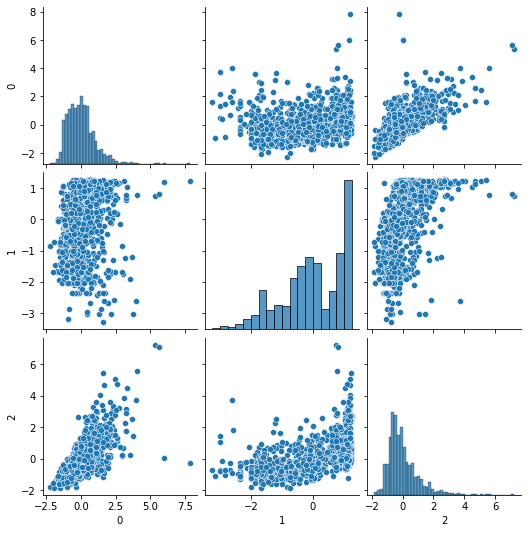

In [ ]:
sns.pairplot(pd.DataFrame(std_mini_data));

In [ ]:
X=log_mini_data[['GrLivArea','YearBuilt']].values
y=log_mini_data['SalePrice'].values

In [ ]:
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)

In [ ]:
model=DecisionTreeRegressor().fit(X_train,y_train)
y_pred=model.predict(X_valid)

mse=mean_squared_error(y_pred,y_valid)
print('MSE:{:.3f}'.format(mse))

MSE:0.084


In [ ]:
n=20
models=[]
for i in range(n):
    X_bagging,X_,y_bagging,y_=\
    train_test_split(X_train,y_train,train_size=0.2,shuffle=True)
    model=DecisionTreeRegressor()
    model.fit(X_bagging,y_bagging)
    models.append(model)
y_pred=np.zeros(len(X_valid))
for regr in models:
    pred=regr.predict(X_valid)
    y_pred=y_pred + pred

y_pred=y_pred/n

mse=mean_squared_error(y_pred,y_valid)
print('MSE:{:.3f}'.format(mse))


MSE:0.048


In [ ]:
class Stacking():
    """
    Class for stacking
    Parameters
    ----------
    max_depth : int
      Maximum learning depth for stacking
    splits : int
      Number of data divisions when creating blend data (number of CV divisions)
    models : dictionary
      Pass in the training model {key:n_depth, values:model}.
    fit_models : list
      List of trained models to be saved
    """
    def __init__(self, max_depth, splits, models):
        self.max_depth = max_depth
        self.n_splits = splits
        self.models = models
        self.fit_models = []
        
    def blending(self,X,y,m):
        """
        Function to create blend data
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        y : ndarray of the following form, shape (n_samples,)
            Label value of training data
        m : class
            Instances of the training model
        """
        self.y_blend = np.zeros(len(X))
        
        kf = KFold(n_splits=self.n_splits, shuffle=False)
        
        # CV
        for train_index, valid_index in kf.split(X):
            #print('KFold',count,'/',kf.get_n_splits())
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
            
            y_train = y_train.ravel()
            y_valid = y_valid.ravel()
            
            
            # Training model creation with train data
            regr =  m
            regr.fit(X_train, y_train)
            # print(regr.predict(X_valid))
            self.fit_models.append(regr)
            
            # Blend data creation
            self.y_blend[valid_index] = regr.predict(X_valid)
    
    def fit_(self,X,y,depth):
        """
        Function to create blending data at this depth
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        y : ndarray of the following form, shape (n_samples,)
            Label value of training data
        depth : int
            The depth of this stage
        """
        self.depth=depth
        
        # Final learning model
        if self.depth == self.max_depth:
            self.model = self.models[self.depth]
            self.model.fit(X,y)
            return
        
        # Prepare a training model for this depth
        models = self.models[self.depth]
        self.y_blending = np.zeros([len(X),len(models)])
        
        # Create blended data with a training model of this depth
        for i,mdl in enumerate(models):
            self.blending(X,y,mdl)
            self.y_blending[:,i] = self.y_blend
        
        #　X(blend_y) for the next stage
        blend_y = self.y_blending
        
        # recursive
        self.bld = Stacking(self.max_depth, self.n_splits, self.models)
        self.bld.fit_(blend_y,y,depth+1)
        
    def predict_(self,X):
        if self.depth == self.max_depth:
            y_pred = self.model.predict(X)
            return y_pred
            
        else:
            tmp = 0
            self.y_pred = np.zeros(len(X))
            self.y_next = np.zeros([len(X),len(self.models[self.depth])])
            
            for mdl in self.fit_models:
                tmp+=1
                self.y_pred += mdl.predict(X)
                
                if tmp%self.n_splits == 0:
                    self.y_pred = self.y_pred/self.n_splits
                    self.y_next[:,int(tmp/self.n_splits)-1] = self.y_pred
                    self.y_pred = np.zeros(len(X))
                    
            y_pred = self.bld.predict_(self.y_next)
            
        return y_pred   


        

In [ ]:
X=log_mini_data[['GrLivArea','YearBuilt']].values
y=log_mini_data['SalePrice'].values

In [ ]:
X_train,X_valid,y_train,y_valid=\
    train_test_split(X,y,train_size=0.8,random_state=None)
print('X_train:',X_train.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_valid:',y_valid.shape)


X_train: (1168, 2)
X_valid: (292, 2)
y_train: (1168,)
y_valid: (292,)


In [ ]:
model={0:[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()],
       1:[ARDRegression(),SGDRegressor(),DecisionTreeRegressor()],
       2:[HuberRegressor(),ARDRegression(),RandomForestRegressor()],
       3:LinearRegression()}

stk=Stacking(max_depth=3,splits=5,models=model)
stk.fit_(X_train,y_train,0)
y_pred=stk.predict_(X_valid)
print(y_pred)
mse=mean_squared_error(y_pred,y_valid)
print('MSE:{:.3f}'.format(mse))

[12.31812619 12.35690966 11.84414064 11.82367716 12.00617952 12.28164026
 12.14858477 12.20388702 11.36121721 11.67939898 11.8476839  11.79901686
 11.6004169  12.14287269 12.30998627 12.54405081 11.92303234 11.96576287
 12.36307856 12.2864072  11.83749366 11.75392763 12.33999105 11.75679231
 11.87052943 12.14379058 12.18727345 12.02560119 11.66594663 11.4461977
 11.91320645 12.47787435 11.8299574  12.18558362 11.60308181 11.87438324
 12.35623546 12.10860391 12.36448515 12.1926213  12.2357485  12.20561881
 12.19636518 12.45969434 12.35411439 12.19062227 12.10130615 11.99809824
 11.83798793 11.79239936 11.97632858 11.67557234 12.12231154 11.84591841
 11.68009288 11.62280762 12.28281263 11.98055517 12.39907571 11.85040277
 12.42374256 11.51526421 12.11337294 11.65720884 11.36431165 11.79447857
 11.63141289 12.56118508 11.79822206 11.85999121 12.33848223 11.30392728
 12.09543568 12.46328712 11.60308181 12.39172756 11.83985657 12.20736273
 11.52769952 13.04756117 11.7334388  11.63900423 12.

In [ ]:
model= {"LinearRegression":LinearRegression(),
        "Ridge":Ridge(),
        "Lasso":Lasso(),
        "ElasticNet":ElasticNet(),
        "Polynomial_deg2":Pipeline([('polly',PolynomialFeatures(degree=2)),('linear',LinearRegression())]),
        "Polynomial_deg3":Pipeline([('polly',PolynomialFeatures(degree=3)),('linear',LinearRegression())]),
        "Polynomial_deg4":Pipeline([('polly',PolynomialFeatures(degree=4)),('linear',LinearRegression())]),
        "Polynomial_deg5":Pipeline([('polly',PolynomialFeatures(degree=5)),('linear',LinearRegression())]),
        "KNeighborsRegressor":KNeighborsRegressor(n_neighbors=3),
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "RandomForestRegressor":RandomForestRegressor(),
        "SVR":SVR(kernel='rbf',C=1e3,gamma=0.1,epsilon=0.1),
        "GaussianProcessRegressor":GaussianProcessRegressor(),
        "SGDRegressor":SGDRegressor(),
        "MLPRegressor":MLPRegressor(hidden_layer_sizes=(10,10),max_iter=100,early_stopping=True,n_iter_no_change=5),
        "ExtraTreesRegressor":ExtraTreesRegressor(n_estimators=100),
        "PLSRegression":PLSRegression(n_components=100),
        "PassiveAggressiveRegressor":PassiveAggressiveRegressor(max_iter=100,tol=1e-3),
        "TheilSenRegressor":TheilSenRegressor(random_state=0),
        "RANSACRegressor":RANSACRegressor(random_state=0),
        "HistGradientBoostingRegressor":HistGradientBoostingRegressor(),
        "AdaBoostRegressor":AdaBoostRegressor(random_state=0,n_estimators=100),
        "BaggingRegressor":BaggingRegressor(base_estimator=SVR(),n_estimators=10),
        "GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
        "VotingRegressor":VotingRegressor([('lr',LinearRegression()),('rf',RandomForestRegressor(n_estimators=10))]),
        "StackingRegressor":StackingRegressor(estimators=[('lr',RidgeCV()),('svr',LinearSVR())],final_estimator=RandomForestRegressor(n_estimators=100)),
        "ARDRegression":ARDRegression(),
        "HuberRegressor":HuberRegressor(), 
        }